<a href="https://colab.research.google.com/github/ReganovaLisa/BCI_Skoltech_september2021/blob/main/%22About_p_value%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

**Как строится выборка?**

Есть Генеральная совокупность объектов (population), из которой путем определенной процедуры выбора (наблюдения, sampling) создается подмножество элементов (sample set).

**Как получаются данные?**

Данные получаются в результате процедуры измерения каких-либо параметров наблюдаемой выборки.

**Пример**

Потенциалы электродов в каждый момент времени. Генеральная совокупность — объективный физический потенциал в каждый момент времени в каждой точке пространства. Выборка — потенциал, измеренный с помощью EEG системы, в определенные моменты времени в определенных точках пространства.

*Параметр* - величина, характеризующая генеральную совокупность  (популяционное среднее и дисперсия)  
*Статистика* - величина, характеризующая выборку (среднее выборки, дисперсия выборки)

Пример статистик: $\overline{x}$ (среднее), $s^2$  (вариация)  
Пример параметров: $\mu$, $\sigma^2$

**В чем проблема?**
Данные после процедуры измерения (даже с одного и того же объекта) получаются различные, данные варьируются (*семь раз отмерь*). Например, может влиять как процедура измерения (инструментальная, методологическая ошибка), так и неоднозначность самой измеряемой величины (например, температура может варьироваться). Но по одному измерению составить вывод об источнике этих различий нельзя.

**Как описать эту *различность*?**  
С помощью вероятности -- количественной оценки наступления события, например  
- выпадения орла/решки, 
- выпадения стороны кубика
- нахождения измеренного потенциала в диапазоне между 1.32µВ и 1.33µВ.  

Частотная вероятность  
$p_{event}=\frac{n_{event}}{N_{events}}$, где $n_{event}$ количество одного событий одного типа, а $N_{events}$ — количество всех события. Крайне желательно, чтобы $N_{events}>>1$, а теоретически необходимо $N_{events} \rightarrow inf$, чего на практике не встречается.

**Почему диапазон?**  
Потому что у каждого измерительного прибора есть конечная (дискретная) шкала, точнее которой невозможно измерить, то есть сама процедура измерения накладывает верхнюю и нижнюю границу на измеряемую непрерывную величину. А сам процесс называется *дискретизация*.

**Диапазоны АЦП**

- *Arduino* Uno/Nano  
Диапазон 0..5В, количество бит — 10, количество отсчетов - 1024,   
шаг АЦП $\frac{5В-0В}{1024}\approx0.005В = 5мВ$

- *STM32F103xx*  
Диапазон 0..3.3В, количество бит — 12, количество отсчетов - 4096  
шаг АЦП $\frac{3.3В-0В}{4096} \approx 8\cdot10^{-4}В \approx 0.1мВ$

- *STM32H743xx*  
Диапазон 0..3.3В, количество бит — 16, количество отсчетов — $65536$  
шаг АЦП $\frac{3.3В-0В}{65536} \approx 5\cdot10^{-5}В \approx 50µВ$

- Analog Devices ADC *ad7739*  
Диапазон 0..3.3В, количество бит — 24, количество отсчетов — 16777216 (16.7 млн)  
шаг АЦП $\frac{3.3В-0В}{16.7млн} \approx 2\cdot10^{-7}В \approx 200нВ$

# Как будем ставить эксперименты

Будем буквально выбирать элементы из выборки

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# выбираем - наблюдаем броски кубика
np.random.choice([1,2,3,4,5,6])

5

In [ ]:
# наблюдаем броски монетки
np.random.choice(["Орел", "Решка"], size=10)

array(['Орел', 'Орел', 'Орел', 'Решка', 'Решка', 'Решка', 'Орел', 'Орел',
       'Орел', 'Орел'], dtype='<U5')

In [ ]:
np.random.choice([1,2,3,4,5,6], size=10)

array([5, 1, 1, 3, 1, 6, 2, 3, 5, 4])

In [ ]:
np.random.choice([1,2,3,4,5,6], 
                 size=10,
                 p = [1,1,1,1,1,5])

ValueError: ignored

In [ ]:
weights = np.array([1,1,1,1,1,5], dtype='double')
weights /= weights.sum()
np.random.choice([1,2,3,4,5,6], size=3, p = weights)

array([2, 6, 5])

(array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.]),
 array([0.5       , 0.83333333, 1.16666667, 1.5       , 1.83333333,
        2.16666667, 2.5       , 2.83333333, 3.16666667, 3.5       ,
        3.83333333, 4.16666667, 4.5       , 4.83333333, 5.16666667,
        5.5       , 5.83333333, 6.16666667, 6.5       ]),
 <a list of 18 Patch objects>)

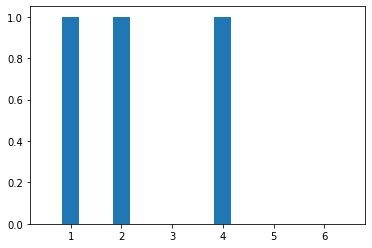

In [ ]:
weights = np.array([1,1,1,1,1,5], dtype='double')
weights /= weights.sum()
X = np.random.choice([1,2,3,4,5,6], size=3, p = weights)

plt.figure()
plt.hist(X, bins=np.linspace(0.5, 6.5, 3*6+1))

# Увеличим плостность выборки

('Шаг координат', 1.0526315789473684)

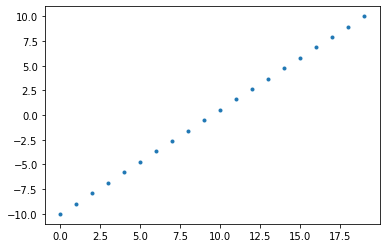

In [ ]:
coords = np.linspace(-10, 10, 20) # например, это потенциал от -10µВ до +10µВ
dc = np.diff(coords).mean()
plt.plot(coords, '.')
'Шаг координат', dc

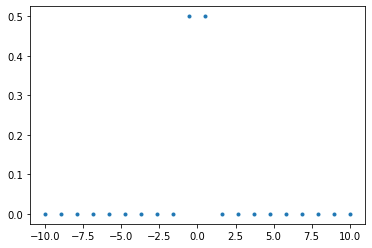

In [ ]:
# Введем буквально распределение вероятности
weights = np.zeros_like(coords)
weights[np.abs(coords)<1] = 1
weights/= weights.sum()
plt.figure()
plt.plot(coords, weights, '.')

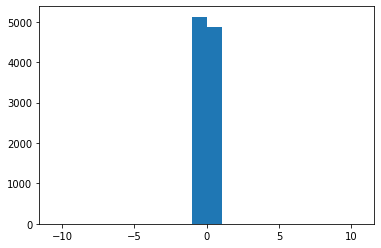

In [ ]:
# Генерируем выборку
X = np.random.choice(coords, size=10000, p = weights)
plt.figure()
plt.hist(X, bins=np.linspace(coords.min() - dc/2, coords.max()+dc/2, len(coords)+1));

Шаг координат 0.20202020202020202


Text(0.5, 1.0, 'Распределение значений в выборке')

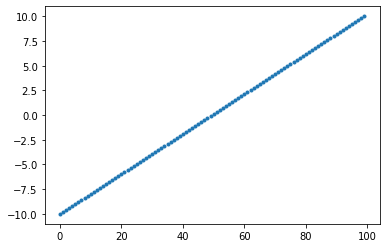

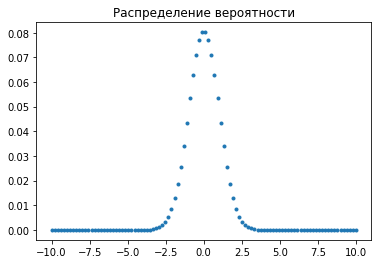

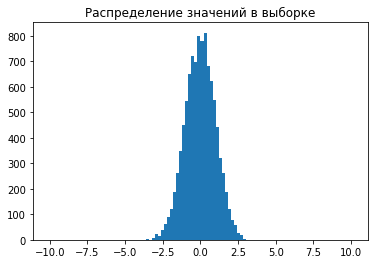

In [ ]:
coords = np.linspace(-10, 10, 100) # например, это потенциал от -10µВ до +10µВ
dc = np.diff(coords).mean()
plt.plot(coords, '.')
print('Шаг координат', dc)

# Введем гауссово распределение вероятности
weights = np.exp(-(coords-0)**2/(2*1**2))
weights/= weights.sum()
plt.figure()
plt.plot(coords, weights, '.')
plt.title('Распределение вероятности')

# Генерируем выборку
X = np.random.choice(coords, size=10000, p = weights)
plt.figure()
plt.hist(X, bins=np.linspace(coords.min() - dc/2, coords.max()+dc/2, len(coords)+1));
plt.title('Распределение значений в выборке')

Text(0.5, 1.0, 'Распределение значений в выборке с помощью scipy.stats.norm')

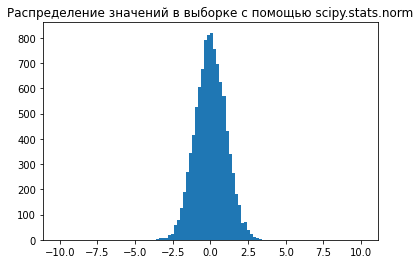

In [ ]:
from scipy.stats import norm
X = norm.rvs(loc = 0, scale=1, size=10000)

plt.figure()
plt.hist(X, bins=np.linspace(coords.min() - dc/2, coords.max()+dc/2, len(coords)+1));
plt.title('Распределение значений в выборке с помощью scipy.stats.norm')

# Почему мы (чаще всего) работаем в гипотезе нормального распределения?

Из-за центральной предельной теоремы

Шаг координат 0.20202020202020202


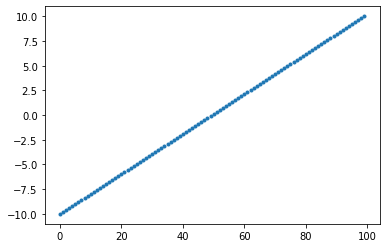

In [ ]:
coords = np.linspace(-10, 10, 100) # например, это потенциал от -10µВ до +10µВ
dc = np.diff(coords).mean()
plt.plot(coords, '.')
print('Шаг координат', dc)


Text(0.5, 1.0, 'Распределение значений в выборке')

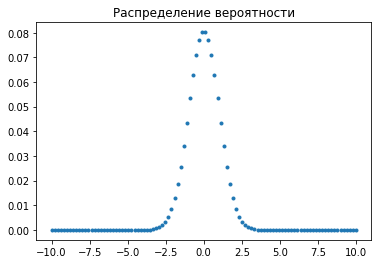

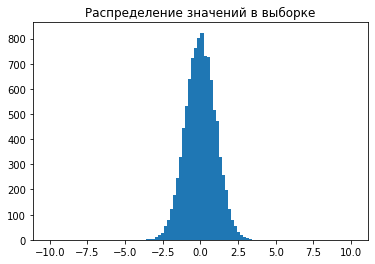

In [ ]:
# Введем гауссово распределение вероятности
weights = np.exp(-(coords-0)**2/(2*1**2))
weights/= weights.sum()
plt.figure()
plt.plot(coords, weights, '.')
plt.title('Распределение вероятности')

# Генерируем выборку
X = np.random.choice(coords, size=10000, p = weights)
plt.figure()
plt.hist(X, bins=np.linspace(coords.min() - dc/2, coords.max()+dc/2, len(coords)+1));
plt.title('Распределение значений в выборке')

(-10.0, 10.0)

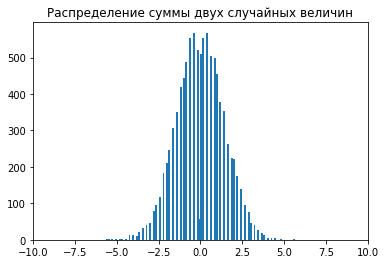

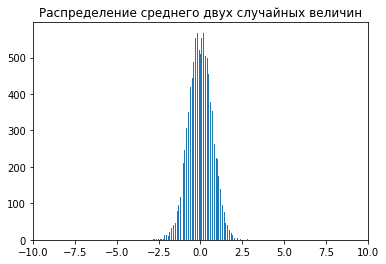

In [ ]:
# Если взять две случайные величины
X1 = np.random.choice(coords, size=10000, p = weights)
X2 = np.random.choice(coords, size=10000, p = weights)

X = X1+X2
plt.figure()
plt.hist(X, bins=100);
plt.title('Распределение суммы двух случайных величин')
plt.xlim(coords.min(), coords.max())

X = (X1+X2)/2
plt.figure()
plt.hist(X, bins=100);
plt.title('Распределение среднего двух случайных величин')
plt.xlim(coords.min(), coords.max())

(-10.0, 10.0)

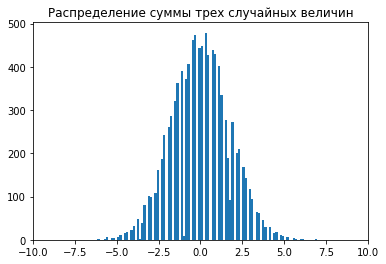

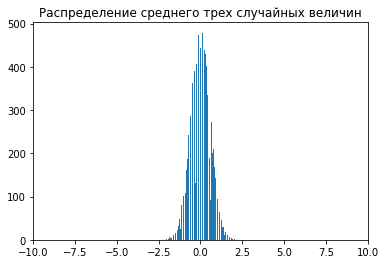

In [ ]:
# Если взять три случайные величины
X1 = np.random.choice(coords, size=10000, p = weights)
X2 = np.random.choice(coords, size=10000, p = weights)
X3 = np.random.choice(coords, size=10000, p = weights)

X = X1+X2+X3
plt.figure()
plt.hist(X, bins=100);
plt.title('Распределение суммы трех случайных величин')
plt.xlim(coords.min(), coords.max())

X = (X1+X2+X3)/3
plt.figure()
plt.hist(X, bins=100);
plt.title('Распределение среднего трех случайных величин')
plt.xlim(coords.min(), coords.max())

In [ ]:
# Если взять 100 случайных величин
XX = np.stack([np.random.choice(coords, size=10000, p = weights) for i in range(100)], axis=0)
XX.shape

(100, 10000)

Text(0.5, 1.0, 'Распределение среднего 100 случайных величин')

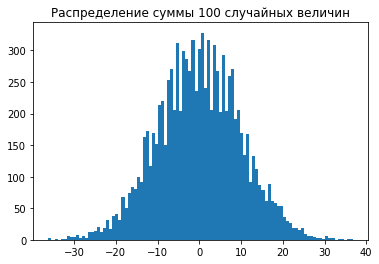

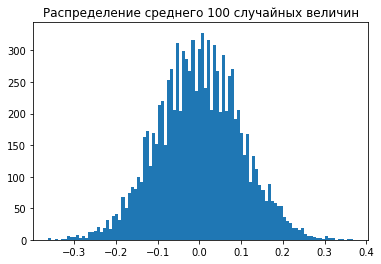

In [ ]:
X = XX.sum(0)
plt.figure()
plt.hist(X, bins=100);
plt.title('Распределение суммы 100 случайных величин')
# plt.xlim(coords.min(), coords.max())

X = XX.mean(0)
plt.figure()
plt.hist(X, bins=100);
plt.title('Распределение среднего 100 случайных величин')
# plt.xlim(coords.min(), coords.max())

In [ ]:
# Берем 1000 различных распределений
N_sets = 1000

mus = np.random.choice(np.linspace(-1,1,20), N_sets) # выбираем средние
sigmas = np.random.choice(np.linspace(0.1, 2, 20), N_sets) # выбираем разбросы

Weights = np.stack([np.exp(-(coords-mu)**2/(2*(sigma)**2)) for mu, sigma in zip(mus, sigmas)], axis=0)
Weights /= Weights.sum(axis=1, keepdims=True)
print(Weights.shape)


(1000, 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead
  """Entry point for launching an IPython kernel.


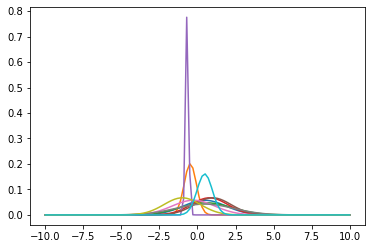

In [ ]:
indeces = np.random.random_integers(0, len(Weights), size=10)

plt.figure()
plt.plot(coords, Weights[indeces, :].T)

In [ ]:
# Генерируем выборки
sample_set_size = 10000

XX = np.stack([np.random.choice(coords, size=sample_set_size, p = w) for w in Weights])
XX.shape

(1000, 10000)

Text(0.5, 1.0, 'Распределение значений в выборках')

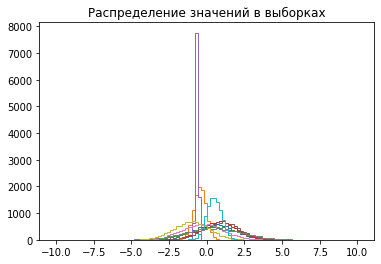

In [ ]:
plt.figure()
for x in XX[indeces, :]:
  plt.hist(x, bins=np.linspace(coords.min() - dc/2, coords.max()+dc/2, len(coords)+1), histtype='step');
plt.title('Распределение значений в выборках')

Text(0.5, 1.0, 'Распределение среднего 100 случайных величин')

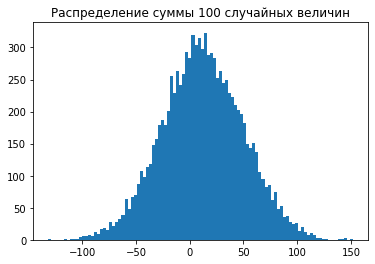

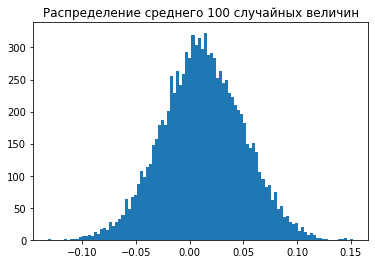

In [ ]:
X = XX.sum(0)
plt.figure()
plt.hist(X, bins=100);
plt.title('Распределение суммы 100 случайных величин')
# plt.xlim(coords.min(), coords.max())

X = XX.mean(0)
plt.figure()
plt.hist(X, bins=100);
plt.title('Распределение сриеднего 100 случайных величин')
# plt.xlim(coords.min(), coords.max())

Text(0.5, 1.0, 'Случайные распределения')

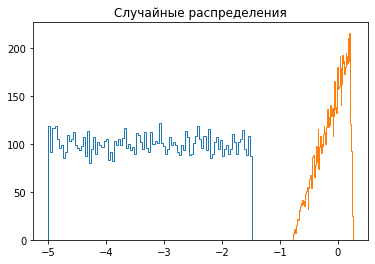

In [ ]:
# Берем различные типы распределений

from scipy.stats import uniform, triang

X_uniforms = np.stack([uniform.rvs(loc=np.random.choice(np.linspace(-5, 0, 20)), 
                                   scale=np.random.choice(np.linspace(1, 5, 20)), 
                                   size=sample_set_size) for i in range(100)], axis=0)

X_triang = np.stack([triang.rvs(np.random.choice(np.linspace(0, 1, 20)), 
                                loc=np.random.choice(np.linspace(-5, 0, 20)), 
                                scale=np.random.choice(np.linspace(0, 5, 20)), size=sample_set_size) for i in range(100)], axis=0)

plt.hist(X_uniforms[0], bins=100, histtype='step');
plt.hist(X_triang[0], bins=100, histtype='step');
# plt.xlim(-10, 10)
plt.title('Случайные распределения')

Text(0.5, 1.0, 'Распределение сриеднего случайных величин')

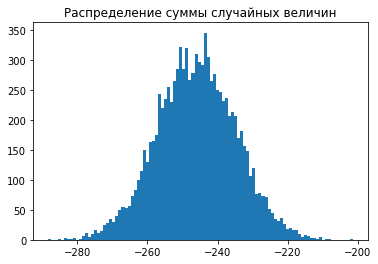

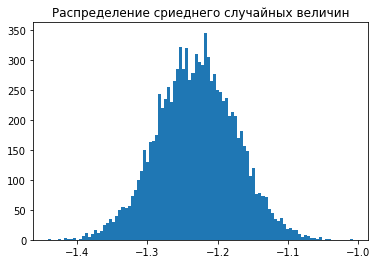

In [ ]:
XX = np.concatenate([X_uniforms, X_triang], axis=0)

X = XX.sum(0)
plt.figure()
plt.hist(X, bins=100);
plt.title('Распределение суммы случайных величин')
# plt.xlim(coords.min(), coords.max())

X = XX.mean(0)
plt.figure()
plt.hist(X, bins=100);
plt.title('Распределение сриеднего случайных величин')
# plt.xlim(coords.min(), coords.max())

# Зачем нужны большие выборки при анализе? 

## Закон больших чисел

In [ ]:
# Допустим, есть одно распределение, и надо составить среднее от выборки длины N
N = 10
X = norm.rvs(loc=0, scale=1, size=N)
X.mean()

0.2576896005608096

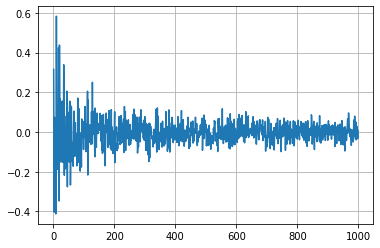

In [ ]:
Xavs = [norm.rvs(loc=0, scale=1, size=N).mean() for N in range(1, 1000)]
plt.figure()
plt.plot(np.arange(1,1000), Xavs)
plt.grid(True)
# plt.xscale('log')

## Стандартная ошибка

(9, 10000)


Text(0.5, 1.0, 'Распределение одного измерения')

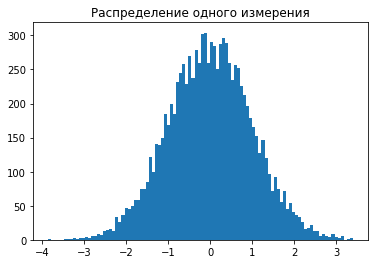

In [ ]:
# Если у нас несколько распределений, как будет распределено их среднее?

N_sample_sets = 9

from scipy.stats import norm

XX = np.stack([norm.rvs(loc=0, scale=1, size=10000) for i in range(N_sample_sets)], axis=0)
print(XX.shape)

plt.figure()
plt.hist(XX[0], bins=100);
plt.title('Распределение одного измерения')

Text(0.5, 1.0, 'Распределение среднего 9 измерений')

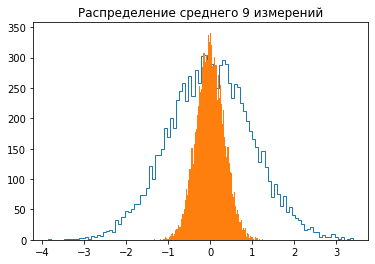

In [ ]:
X = XX.mean(0)
plt.figure()
plt.hist(XX[0], bins=100, histtype='step');
plt.hist(X, bins=100);
plt.title(f'Распределение среднего {N_sample_sets} измерений')

**Стандартная ошибка**
$\sigma_{av} = \frac{\sigma_{pop}}{\sqrt{n}}$

## Интервалы 

Пока еще не доверительные интервалы (confidence intervals), но близко

### Вопрос — если выбрать величину, то с какой вероятностью она будет лежать в диапазонах [-1,1], [-2,2], [-3,3]?


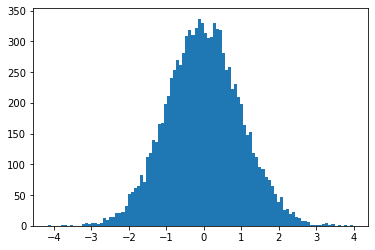

In [ ]:
X = norm.rvs(loc=0, scale=1, size=10000)
plt.figure()
plt.hist(X, bins=100);

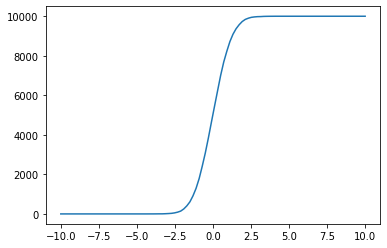

In [ ]:
# кумулятивная характеристика - сколько элементов выборки находилось меньше значения m
M = np.linspace(-10, 10, 100)
cumulative_sum = [np.sum(X<m) for m in M]
plt.plot(M, cumulative_sum)

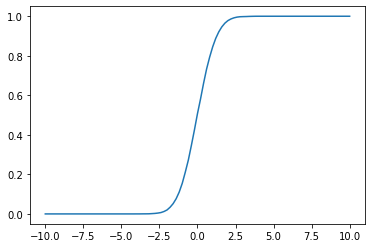

In [ ]:
# кумулятивная плотность
M = np.linspace(-10, 10, 101)
cumulative_density = [np.sum(X<m)/len(X) for m in M]
plt.plot(M, cumulative_density)

Полная вероятность найти элемент в диапазоне от $m_1$ до $m_2$ - разность значений Cumulative Density Functions (CDF)

$P(m_1<x<m_2) = CDF(m_2) - CDF(m_1)$

Распределение плотности вероятности (PDF, Probability Density Function):

$PDF(m) = \frac{dCDF(m)}{dm}$

In [ ]:
# найдем индексы границ
np.where(M==3)[0][0]

65

In [ ]:
m1_index = np.where(M==-1)[0][0]
m2_index = np.where(M==1)[0][0]
cumulative_density[m2_index] - cumulative_density[m1_index]

0.6906000000000001

In [ ]:
m1_index = np.where(M==-2)[0][0]
m2_index = np.where(M==2)[0][0]
cumulative_density[m2_index] - cumulative_density[m1_index]

0.9579

In [ ]:
m1_index = np.where(M==-3)[0][0]
m2_index = np.where(M==3)[0][0]
cumulative_density[m2_index] - cumulative_density[m1_index]

0.9966

### Обратный вопрос — какой диапазон должен быть, чтобы случайно выбранная из выборки величина оказалась в нем с полной вероятностью P?


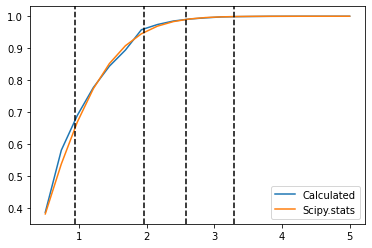

In [ ]:
N = np.linspace(0.5, 5, 20)
P = [cumulative_density[np.abs(M-m).argmin()] - cumulative_density[np.abs(M+m).argmin()] for m in N]

plt.figure()
plt.plot(N, P)
 
# то же самое средствами scipy.stats
plt.plot(N, norm.cdf(N) - norm.cdf(-N))
plt.legend(['Calculated', 'Scipy.stats'])

for p in [0.65,0.95, 0.99, 0.999]:
  plt.axvline(norm.interval(p, loc=0, scale=1)[-1], color='k', ls='--')


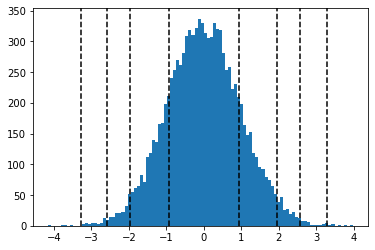

In [ ]:
# то же самое на общем графике
plt.figure()
plt.hist(X, bins=100)
for p in [0.65, 0.95, 0.99, 0.999]:
  plt.axvline(norm.interval(p, loc=0, scale=1)[-1], color='k', ls='--')
  plt.axvline(norm.interval(p, loc=0, scale=1)[0], color='k', ls='--')

### А если нужен интервал для среднего?

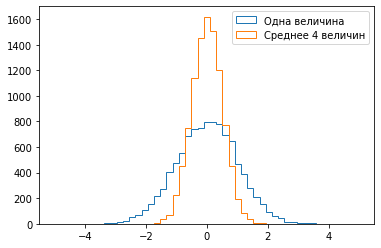

In [ ]:
N_averages = 4

XX = np.stack([norm.rvs(loc=0, scale=1, size=10000) for i in range(N_averages)], axis=0)
X = XX[0]
X_av = XX.mean(0)

plt.figure()
plt.hist(X, bins=np.linspace(-5, 5, 50), histtype='step');
plt.hist(X_av, bins=np.linspace(-5, 5, 50), histtype='step');
plt.legend(['Одна величина', f'Среднее {N_averages} величин'])

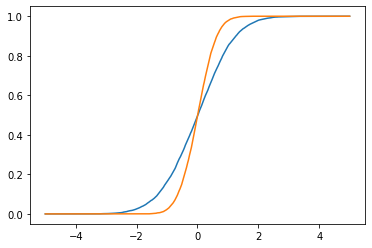

In [ ]:
M = np.linspace(-5, 5, 501)
cumulative_density_one = [np.sum(X<m)/len(X) for m in M]
cumulative_density_av = [np.sum(X_av<m)/len(X_av) for m in M]

plt.figure()
plt.plot(M, cumulative_density_one)
plt.plot(M, cumulative_density_av)


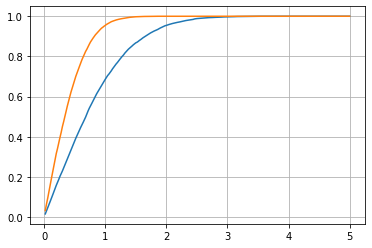

In [ ]:
N = M[M>0]
P_one = [cumulative_density_one[np.abs(M-m).argmin()] - cumulative_density_one[np.abs(M+m).argmin()] for m in N]
P_av  = [cumulative_density_av[np.abs(M-m).argmin()] - cumulative_density_av[np.abs(M+m).argmin()] for m in N]

plt.figure()
plt.plot(N, P_one)
plt.plot(N, P_av)
plt.grid(True)

Вспомним, что стандартная ошибка $\sigma_{av} = \frac{\sigma_{pop}}{\sqrt{n}}$

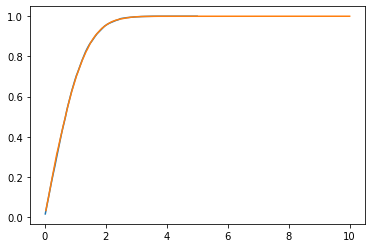

In [ ]:
# Hint
plt.figure()
plt.plot(N, P_one)
plt.plot(N*np.sqrt(N_averages), P_av)

Значит, что интервал для среднего нескольких величин из одного нормального распределения $\approx$ интервал для одиночной величины $/\sqrt(n)$

# Как оценить параметры распределения?

Проблема — во всех экспериментах до этого мы **знали**, какими были параметры популяции, — $\mu$, $\sigma$

Вопрос — исходя из конкретной реализации, какими будут наилучшие оценки для этих параметров (точечная оценка)?

Какие оценки хорошие?
- Несмещенные — нет систематического отклонения оценки среднего от истиного значения
- Состоятельность — если при увеличении размера выборки $n \rightarrow inf$ вероятность оценки параметра быть истиным стремится к 1
- Эффективность — из всех других оценок обладает наименьшей дисперсией от истиного параметра

Для оценки $\mu$ для нормального распределения:
1. Среднее по выборке $\overline{x}$ — несмещенная, состоятельная, эффективная оценка
2. Медиана по выборке $Median(x)$ - несмещенная, состоятельная, но не эффективная оценка, т.е. ее дисперсия выше, чем у среднего $\overline{x}$

Однако оценить $\sigma^2$ нетривиально:
1. Интуитивная оценка дисперсии $\frac{1}{n}\sum_{1}^{n}{(x_i - \overline{x})^2}$ является только лишь *асимптотически* несмещённой, асимптотически эффективной, но состоятельной
2. Наилучшей (несмещённой, состоятельной, эффективной) оценкой дисперсии является скорректированная дисперсия $\frac{1}{n-1}\sum_{1}^{n}{(x_i - \overline{x})^2}$

In [ ]:
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Демонстрация
n_sets = 1000
n_samples = 5000
XX = norm.rvs(loc=0, scale=1, size=(n_sets, n_samples))
XX.shape

(1000, 5000)

In [ ]:
def biased(x, axis=-1):
  return np.sum((x - x.mean(axis=axis, keepdims=True))**2, axis=axis, keepdims=True)/(x.shape[axis])

def unbiased(x, axis=-1):
  return np.sum((x - x.mean(axis=axis, keepdims=True))**2, axis=axis, keepdims=True)/(x.shape[axis]-1)  

In [ ]:
numbers = np.arange(2, n_samples+1)

biased_var = np.concatenate([biased(XX[:, :i]) for i in numbers], axis=-1)
unbiased_var = np.concatenate([unbiased(XX[:, :i]) for i in numbers], axis=-1)

In [ ]:
biased_var.shape, unbiased_var.shape

((1000, 4999), (1000, 4999))

Text(0, 0.5, 'Точечная оценка дисперсии')

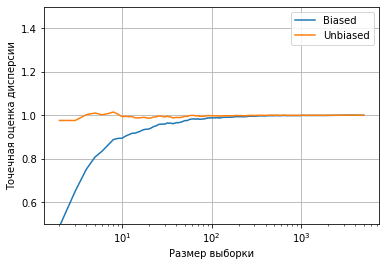

In [ ]:
plt.figure()
plt.plot(numbers, np.mean(biased_var, 0))
plt.plot(numbers, np.mean(unbiased_var, 0))
plt.legend(['Biased', 'Unbiased'])
plt.grid(True)
plt.ylim(0.5, 1.5)
plt.xscale('log')
plt.xlabel('Размер выборки')
plt.ylabel('Точечная оценка дисперсии')

## Интервальные оценки с учетом малой выборки

Если размер выборки большой ($N_{samples}>>1$), то в качестве интервальных оценок могут быть использованы интервалы с оценками среднего и вариацией из точечных оценок по выборке. Но если $N_{samples}=1..10$, то так делать нельзя.

**Почему?**  ~~Потому что матстат~~  
Потому что мы _не знаем_ параметров генеральной выборки.
Соответственно, интервальная оценка будет зависеть от того, какую форму представляет распределение $\overline{x}$

$\overline{x} \text{~Student's t-distribution}(\mu, \text{St.err}, N_{samples}-1)$  
$\mu$ — истиное значение среднего генеральной совокупности  
$\text{St.err}$ — стандартная ошибка по выборке  
$N_{samples}-1$ — количество степеней свободы выборки


**А как на практике?**  
```scipy.stats.t.interval(alpha, df, loc=0, scale=1)```

вот это чаще всего и называется доверительным интервалом

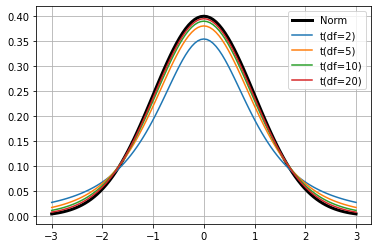

In [ ]:
from scipy.stats import t
coords = np.linspace(-3, 3, 101)
plt.figure()
plt.plot(coords, norm.pdf(coords), color='k', lw=3)
plt.plot(coords, t.pdf(coords, df=2))
plt.plot(coords, t.pdf(coords, df=5))
plt.plot(coords, t.pdf(coords, df=10))
plt.plot(coords, t.pdf(coords, df=20))
plt.legend(['Norm', 't(df=2)', 't(df=5)', 't(df=10)', 't(df=20)'])
plt.grid(True)

Text(0.5, 1.0, 'Доверительные интервалы')

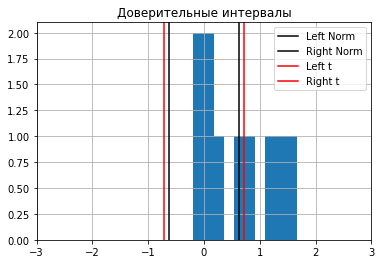

In [ ]:
from scipy.stats import t, norm
from matplotlib import pyplot as plt
import numpy as np

X = norm.rvs(size=10, loc=0, scale=1)
plt.figure()
plt.hist(X, bins=10)

for x in norm.interval(0.95, loc=0, scale=1/np.sqrt(len(X))):
  plt.axvline(x, color='k')

for x in t.interval(0.95, loc=0, scale=1/np.sqrt(len(X)), df=len(X)-1):
  plt.axvline(x, color='r')

plt.legend(['Left Norm', 'Right Norm', 'Left t', 'Right t'])

plt.xlim(-3, 3)
plt.grid(True)
plt.title('Доверительные интервалы')

# Различия двух случайных величин (представленных выборками)

В эксперименте мы обычно проводим измерения, которые создают данные. Данные могут относится к двум разным условиям проведения эксперимента (Conditions). Похожесть или различие данных может свидетельствовать о наличии эффекта, вызванного изменением условия.

## Но начнем с эффекта различия величины от 0

У нас есть данные, и мы хотим узнать, отличаются ли они от нуля? А что значит, отличаются ли от 0?

Что значит, что случайная величина $X \approx 0$?  
1. Допустим, все возможные реализации X строго равны 0 - вырожденный случай, т.е. вариация тождественна 0: $S^2==0$
2. А если не вырожденный случай ($S^2>0$). Тогда мы _ожидаем_, что _хотя бы_ в среднем $\overline{x} \approx 0$

Что значит ожидаем? Что с определенной вероятностью, _удобной_ нам, среднее значение случайной величины $X$ попадет в ожидаемый интервал.

Тогда отличие случайной величины от 0 $X \neq 0$, будет означать, что при данном _удобном_ нам уровне вероятности среднее случайной величины $\overline{x}$ не попало в ожидаемый интервал.





Формулируем Гипотезу:  
*Случайная величина $X$, представленная выборкой длины $N_{samples}$, имеет нормальное распределение со средним значением $\mu \approx 0$, при этом истиное значение вариации неизвестно*


(0.22655370362388924, (-0.5464554565819357, 0.5464554565819357))

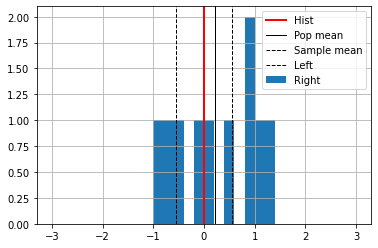

In [ ]:
# сравниваем существующую выборку с 0

X = norm.rvs(loc=0, scale=1, size=10)
variance = np.sum((X-X.mean())**2)/(len(X)-1)
sterr = np.sqrt(variance)/np.sqrt(len(X))

plt.figure()
plt.hist(X, bins=np.linspace(-3, 3, 31))
plt.axvline(0, color = 'r', lw=2)
plt.grid(True)
plt.axvline(X.mean(), color='k', ls='-', lw=1)
for x in t.interval(0.95, scale=sterr, loc=0, df=len(X)-1):
  plt.axvline(x, color='k', ls='--', lw=1)
plt.legend(['Hist', 'Pop mean', 'Sample mean', 'Left', 'Right'])
X.mean(), t.interval(0.95, scale=sterr, loc=0, df=len(X)-1)

'Mean 1.434 interval (-0.641244951685976, 0.641244951685976)'

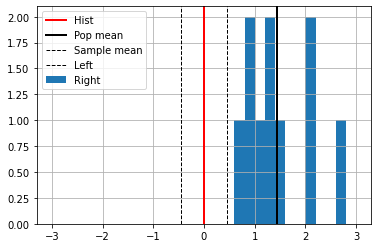

In [ ]:
# введем искусственно смещение
X = norm.rvs(loc=1, scale=1, size=10)
variance = np.sum((X-X.mean())**2)/(len(X)-1)
sterr = np.sqrt(variance)/np.sqrt(len(X))

plt.figure()
plt.hist(X, bins=np.linspace(-3, 3, 31))
plt.axvline(0, color = 'r', lw=2)
plt.grid(True)
plt.axvline(X.mean(), color='k', ls='-', lw=2)
for x in t.interval(0.95, scale=sterr, loc=0, df=len(X)-1):
  plt.axvline(x, color='k', ls='--', lw=1)
plt.legend(['Hist', 'Pop mean', 'Sample mean', 'Left', 'Right'])

f'Mean {X.mean():.3f} interval {t.interval(0.99, scale=sterr, loc=0, df=len(X)-1)}'

**Что такое t-test?**

Mean 1.430 interval -0.644:0.644


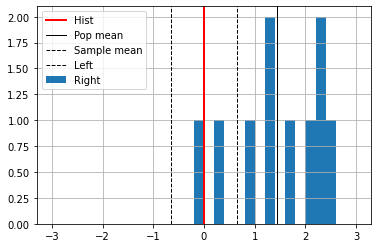

In [ ]:
from scipy.stats import ttest_1samp

# введем искусственно смещение
X = norm.rvs(loc=1, scale=1, size=10)
variance = np.sum((X-X.mean())**2)/(len(X)-1)
sterr = np.sqrt(variance)/np.sqrt(len(X))

plt.figure()
plt.hist(X, bins=np.linspace(-3, 3, 31))
plt.axvline(0, color = 'r', lw=2)
plt.grid(True)
plt.axvline(X.mean(), color='k', ls='-', lw=1)

t_interval = t.interval(0.95, scale=sterr, loc=0, df=len(X)-1)
for x in t_interval:
  plt.axvline(x, color='k', ls='--', lw=1)
plt.legend(['Hist', 'Pop mean', 'Sample mean', 'Left', 'Right'])

print(f'Mean {X.mean():.3f} interval {t_interval[0]:.3f}:{t_interval[1]:.3f}')


$t_{statistic} = \frac{\overline{x} - \mu}{\text{St.err}}$

In [ ]:
tstatistic = (X.mean() - 0)/sterr
print(tstatistic)

5.024421358510879


Если бы гипотеза выполнялась, то интервал, расчитанный по границе, приходящейся на точечную оценку среднего по существующей выборке, покрывал бы кумулятивную вероятность...

In [ ]:
cumulative_probability = t.cdf(tstatistic, df=len(X)-1) - t.cdf(-tstatistic, df=len(X)-1)
cumulative_probability

0.9992852267356531

А что осталось за хвостом интервала?

In [ ]:
1-cumulative_probability

0.0007147732643468796

In [ ]:
print(ttest_1samp(X, popmean=0))

Ttest_1sampResult(statistic=5.024421358510878, pvalue=0.0007147732643468122)


Интерпретация: из-за того, что среднее не попадает в ожидаемый интервал, построенный по _удобному_ значению уровня вероятности (например, 0.95), мы отвергаем гипотезу, что среднее популяции случайной величины равно 0. Уровень значимости

$\text{p-value} = 1-\text{удобная вероятность} = 1-0.95 = 0.05$ 

![Дабумтсс](https://www.meme-arsenal.com/memes/578c61569acfb16525ccd7b3025319d0.jpg)

## Что такое мощность статистического теста?

Это false negative rate, или вероятность неправильного отклонения Нуль-гипотезы, хоть она, на самом деле, верна.

In [ ]:
n_sets = 10000
n_samples = 100
XX = norm.rvs(loc=0, scale=1, size=(n_sets, n_samples)) # они ВСЕ из одной выборки

XX.shape

(10000, 100)

In [ ]:
pv_thresh = 0.05
(ttest_1samp(XX, popmean=0, axis=-1).pvalue<pv_thresh).sum()

497

## Что такое мощность эффекта и при чем тут сигма?

$d=\frac{\text{Измеренная величина} - \text{Ожидаемая величина}}{\text{Разброс величины}}$

$d = \frac{\overline{x} - \mu}{\text{St.err}} = t_{statistic}$

Но что если интерпретировать p-values в рамках нормального распределения (агностичного к степеням свободы)?

величина эффекта будет называться $z = \frac{\overline{x} - \mu}{\sigma}$ 


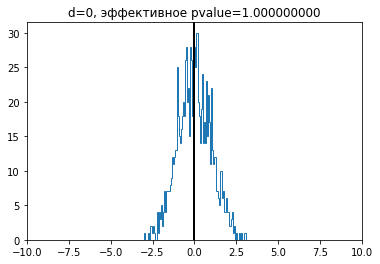

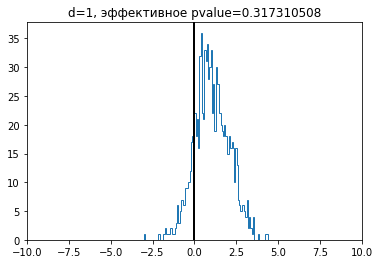

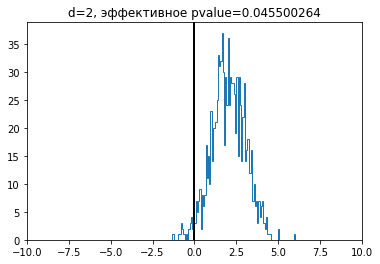

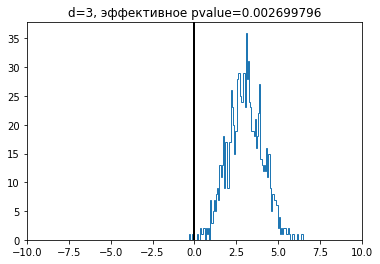

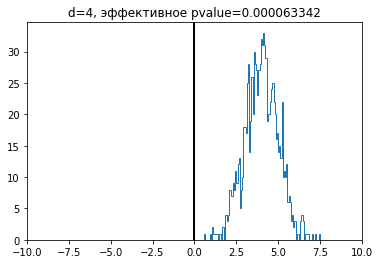

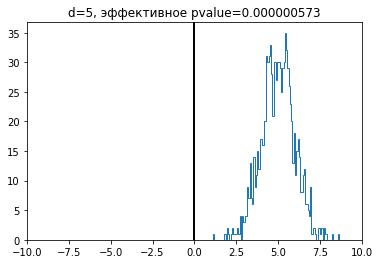

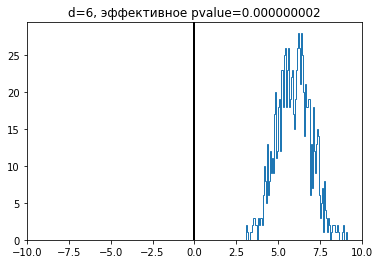

In [ ]:
# положим сигму = 1, а популяционное среднее - 0
for effect in [0,1,2,3,4,5,6]:
  plt.figure()
  plt.hist(norm.rvs(size=1000, loc=effect, scale=1), bins=100, histtype='step')
  plt.axvline(0, color='k', lw=2)
  plt.title(f'd={effect}, эффективное pvalue={1 - (norm.cdf(effect) - norm.cdf(-effect)):.9f}')
  plt.xlim(-10, 10)

## А что если теперь у нас две случайные величины, представленные своими выборками?

Гипотеза:

Среднее популяции одной случайной величины X1 равно среднему популяции другой случайной величины X2, а их дисперсии одинаковы.

$t_{statistic} = \frac{\overline{x_1} - \overline{x_2}}{S_{общее}}$

$S_{общее} \approx \sigma_1 = \sigma_2$


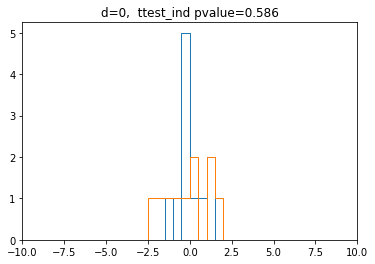

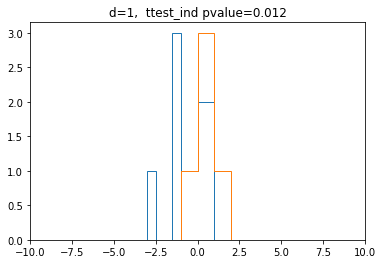

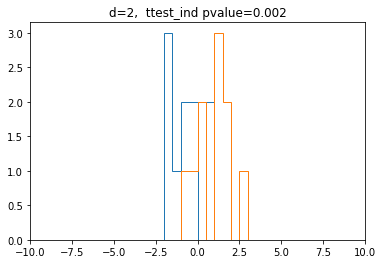

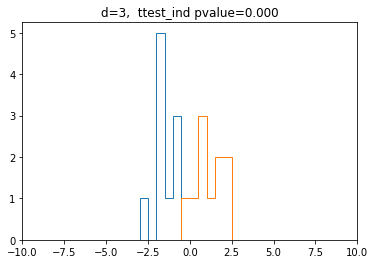

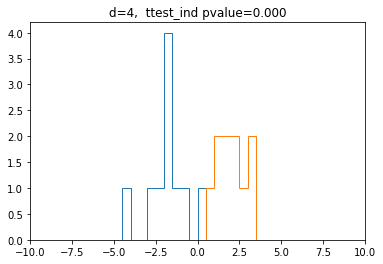

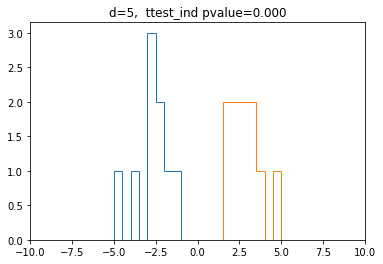

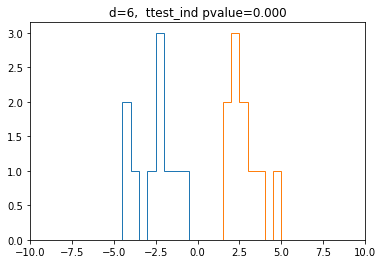

In [ ]:

from scipy.stats import ttest_ind

for effect in [0,1,2,3,4,5,6]:
  plt.figure()
  X1 = norm.rvs(size=10, loc=-effect/2, scale=1)
  X2 = norm.rvs(size=10, loc=effect/2, scale=1)
  plt.hist(X1, bins=np.linspace(-5, 10, 31), histtype='step')
  plt.hist(X2, bins=np.linspace(-5, 10, 31), histtype='step')
  # plt.grid(True)
  plt.title(f'd={effect},  ttest_ind pvalue={ttest_ind(X1, X2, equal_var=True).pvalue:.3f}')
  plt.xlim(-10, 10)


А если дисперсии разные, то вместо

$S_{общее} = S_{Welch} = \sqrt{S_1^2+S_2^2}$

Интерпретация — эффективно будет изучаться гипотетическая разница $X_1 - X_2$, порожденная генеральными выборками, но с параметрами из точечных оценок по конкретным выборкам.

На практике — ставите `equal_var=False`

(-10.0, 10.0)

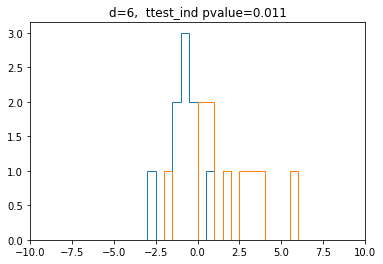

In [ ]:
plt.figure()
X1 = norm.rvs(size=10, loc=0, scale=1)
X2 = norm.rvs(size=10, loc=1, scale=2)
plt.hist(X1, bins=np.linspace(-5, 10, 31), histtype='step')
plt.hist(X2, bins=np.linspace(-5, 10, 31), histtype='step')
# plt.grid(True)
plt.title(f'd={effect},  ttest_ind pvalue={ttest_ind(X1, X2, equal_var=False).pvalue:.3f}')
plt.xlim(-10, 10)

## Что такое парные измерения? 

Когда одно измерение порождает два значения

Например, значения ЭЭГ потенциала до и после стимула

Тогда случайная величина $X = X_1 - X_2$ и дальше работать как с одной величиной

# Что такое проблема множественных сравнений и зачем корректировать p-value? (False discovery rate correction)


Примеры:
- Если мы измеряем потенциал по электродам, а потом производим попарные сравнения выборок между собой. Тогда каждый из электродов будет участвовать в сравнении несколько раз.
- Если мы производим измерения различных параметров, а потом сравниваем их друг с другом == "абсолютное значение второй производной через 350 мс после начала максимального наклона потенциала ERP, отфильтрованного в диапазоне 1-24 Гц"

!!! Чем больше похожих сравнений, тем выше вероятность получить достоверное отклонение

In [ ]:
n_samples=10
n_sets = 32
XX = norm.rvs(size=(n_sets, n_samples), random_state=44)

XX.shape

(32, 10)

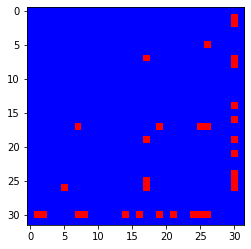

In [ ]:
pvals = np.array([[ttest_ind(X1, X2).pvalue for X1 in XX] for X2 in XX])
plt.imshow(pvals<0.05, cmap='bwr')

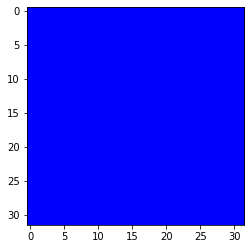

In [ ]:
# Корректировка по Бенферрони

# p_thresh = 0.05/32
pvals = np.array([mne.stats.bonferroni_correction([ttest_ind(X1, X2).pvalue 
                                                  for X1 in XX], alpha=0.05)[1]
                  for X2 in XX])
plt.imshow(pvals<0.05, cmap='bwr')

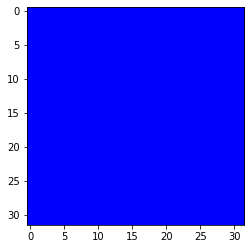

In [ ]:
# Корректировка False Discovery Rate Бенджамини-Хокберга
pvals = np.array([mne.stats.fdr_correction([ttest_ind(X1, X2).pvalue 
                                                  for X1 in XX], alpha=0.05)[1]
                  for X2 in XX])
plt.imshow(pvals<0.05, cmap='bwr')

# Непараметрические тесты

## Wilcoxon signed rank

Гипотеза: случайная величина X (или парная разница X1-X2) распределена симметрично относительно 0 

Статистика: сумма знаков отсортированных по модулю величин

WilcoxonResult(statistic=1633.0, pvalue=0.002162291575214179)

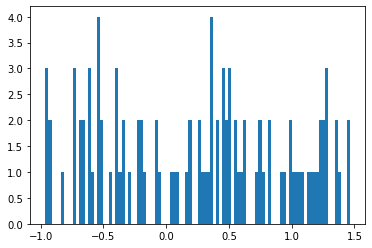

In [ ]:
from scipy.stats import uniform
X = uniform.rvs(loc=-1, scale=2.5, size=100)
plt.hist(X, bins=100);


In [ ]:
from scipy.stats import wilcoxon
wilcoxon(X/1100)

WilcoxonResult(statistic=1633.0, pvalue=0.002162291575214179)

## Mann-Whitney U-test (Rank sum test)

Если две случайных величины X1 и X2 независимы 

Гипотеза — распределения X1 и X2 таковы, что P(x1>x2)==P(x2>x1)

Статистика — сравнение разниц всех комбинаций пар из X1 и X2

Например, для грубых оценок психометрических эффектов



In [ ]:
from scipy.stats import mannwhitneyu

no_drug_group   = np.random.choice(np.arange(3,8), size=100)
with_drug_group = np.random.choice(np.arange(4,9), size=5)

mannwhitneyu(no_drug_group, with_drug_group)

MannwhitneyuResult(statistic=191.0, pvalue=0.1835411384807799)

# Корреляционные тесты

## Корреляционный тест Пирсона

Тест параметрический

Гипотеза — коэффициент корреляции между случайными нормально-распределенными величинами X1 и X2 равен 0

Статистика — коэффициент корреляции

Коэф. корреляции 0.20270332202709515 pvalue= 0.04311470408888646


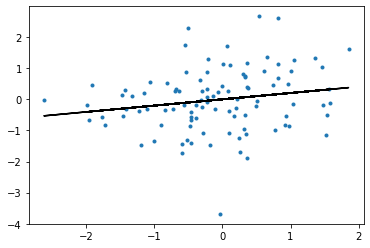

In [ ]:
X1 = norm.rvs(size=(100), random_state=42)
X2 = (X1*0.15) + norm.rvs(size=X1.shape, random_state=51)
plt.figure()
plt.plot(X1, X2, '.')

from scipy.stats import pearsonr
c, pv = pearsonr(X1, X2)
print('Коэф. корреляции', c, 'pvalue=', pv)

plt.plot(X1, c*X1, '-', color='k');


## Корреляционный тест Спирмана

Непараметрический корреляционный тест 

Гипотеза — непараметрический ранговый коэффициент корреляции между двумя случайныйми величинами X1 и X2 = 0

Статистика — взвешенная сумма разниц рангов пар X1 и X2

Интерпретация: зависимость между X1 и X2 — монотонная

Коэф. корреляции 0.23081908190819078 pvalue= 0.02086249536911837


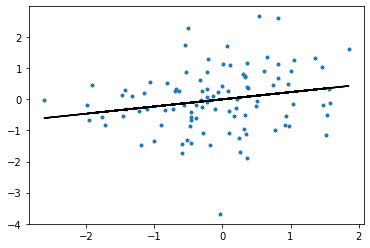

In [ ]:
X1 = norm.rvs(size=(100), random_state=42)
X2 = (X1*0.15) + norm.rvs(size=X1.shape, random_state=51)
plt.figure()
plt.plot(X1, X2, '.')

from scipy.stats import spearmanr
c, pv = spearmanr(X1, X2)
print('Коэф. корреляции', c, 'pvalue=', pv)

plt.plot(X1, c*X1, '-', color='k');


# Куда дальше?

- Изучить python и поиграть с scipy.stats 
- Statsmodels https://www.statsmodels.org/
